[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/Lowe_et_al_2019/fig_2.ipynb)

#### based on Fig. 2 from Lowe et al. 2019 (Nature Comm.)  "_Key drivers of cloud response to surface-active organics_"   
https://doi.org/10.1038/s41467-019-12982-0

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install PySDM-examples \
      notebook==`python -c "import notebook; print(notebook.__version__)"` \
      tornado==`python -c "import tornado; print(tornado.version)"`
    !ldconfig

In [2]:
from PySDM_examples.Lowe_et_al_2019 import Settings, Simulation
from PySDM_examples.Lowe_et_al_2019.aerosol import AerosolBoreal, AerosolMarine, AerosolNascent
from PySDM_examples.utils.show_plot import show_plot
from PySDM.physics.spectra import Lognormal
from PySDM.initialisation import spectral_sampling as spec_sampling
from PySDM.physics import si
import numpy as np
from matplotlib import pyplot

/home/slayoo/devel/PySDM/PySDM/backends/__init__.py:29: UserWarning: CUDA library found but cuInit() failed (error code: 999; message: unknown error)
  warnings.warn(


In [36]:
output = {}
for aerosol in (AerosolMarine(), AerosolBoreal()): # TODO:, AerosolNascent()):
    for model in ('bulk', 'film'):
        key = f"{aerosol.__class__.__name__}-{model}"
        print(key)
        settings = Settings(
            dt=1*si.s, n_sd_per_mode=400, 
            model=model,
            aerosol=aerosol,
            spectral_sampling=spec_sampling.ConstantMultiplicity
        )
        settings.output_interval = 2 * si.s

        simulation = Simulation(settings)
        output[key] = simulation.run()
        output[key]['color'] = aerosol.color

AerosolMarine-bulk
AerosolMarine-film
AerosolBoreal-bulk
AerosolBoreal-film


In [37]:
# for record_number in range(len(output['bulk']['t'])):
#     for key in output.keys():
#         pyplot.step(
#             settings.wet_radius_bins_edges[:-1], # TODO #223 - steps + where='mid'?
#             output[key]['Particles Wet Size Spectrum'][record_number],
#             label=f'wet ({key})'
#         )
#         pyplot.step(
#             settings.dry_radius_bins_edges[:-1], # TODO #223- steps
#             output[key]['Particles Dry Size Spectrum'][record_number],
#             label=f'dry ({key})'
#         )
#     pyplot.xscale('log')
#     pyplot.yscale('log')
#     pyplot.legend()
#     pyplot.grid()
#     pyplot.title(f"t/dt = {record_number}")
#     pyplot.show()

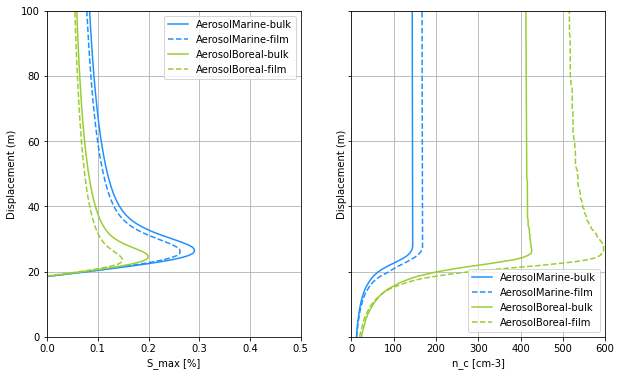

HTML(value="<a href='./tmpyrlmrn78.pdf' target='_blank'>./tmpyrlmrn78.pdf</a><br>")

In [39]:
figsize = (10, 6)
fig, axs = pyplot.subplots(1, 2, figsize=figsize, sharey=True)


for idx, var in enumerate(('S_max', 'n_c_cm3')):
    for key in output.keys():
        Y = np.asarray(output[key]['z'])
        axs[idx].plot(output[key][var], Y, label=key, 
                      color=output[key]['color'],
                      linestyle='-' if key.endswith('-bulk') else '--'
                     )
    axs[idx].set_ylim(0, 100)
    
    axs[idx].set_ylabel('Displacement (m)')
    if var == 'ql':
        axs[idx].set_xlabel('Liquid Water Content (g/kg)')
    elif var == 'S_max':
        axs[idx].set_xlabel('S_max [%]')
        axs[idx].set_xlim(0, 0.5)
    elif var == 'n_c_cm3':
        axs[idx].set_xlabel('n_c [cm-3]')
        axs[idx].set_xlim(0, 600)
    elif var == 'n_a_cm3':
        axs[idx].set_xlabel('n_a [cm-3]')
    else:
        assert False
    
for ax in axs:
    ax.grid()
    ax.legend()
show_plot()